In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dropout,Flatten,Dense,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


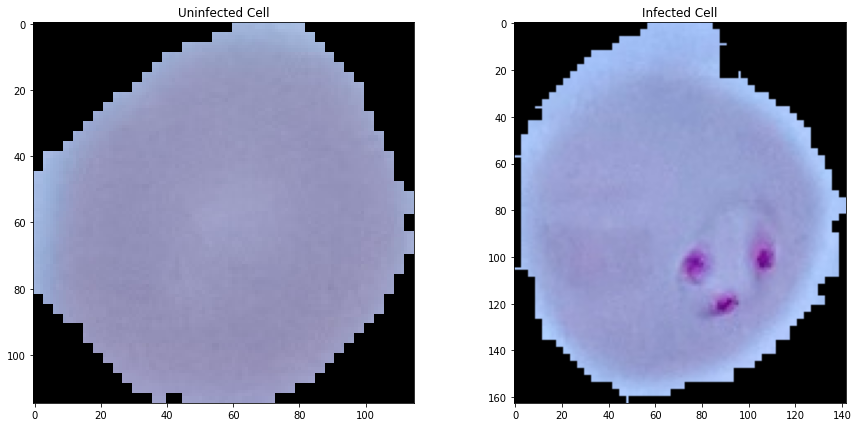

In [ ]:
import cv2

par='/content/drive/MyDrive/C33P1thinF_IMG_20150619_114756a_cell_179.png'
unaff='/content/drive/MyDrive/C1_thinF_IMG_20150604_104722_cell_9.png'
plt.figure(1, figsize = (15 , 7))
plt.subplot(1 , 2 , 1)
plt.imshow(cv2.imread(unaff))
plt.title('Uninfected Cell')

plt.subplot(1 , 2 , 2)
plt.imshow(cv2.imread(par))
plt.title('Infected Cell')


plt.show()


In [ ]:
width = 128
height = 128
datagen = ImageDataGenerator(rescale=1/255.0, validation_split=0.2)
trainDatagen = datagen.flow_from_directory(directory='/content/drive/MyDrive/Cell_images',
                                           target_size=(width,height),
                                           class_mode = 'binary',
                                           batch_size = 20,
                                           subset='training')

Found 600 images belonging to 2 classes.


In [ ]:
valDatagen = datagen.flow_from_directory(directory='/content/drive/MyDrive/Cell_images',
                                           target_size=(width,height),
                                           class_mode = 'binary',
                                           batch_size = 20,
                                           subset='validation')

Found 149 images belonging to 2 classes.


In [ ]:
model = Sequential()
model.add(Conv2D(16,(3,3),activation='relu',input_shape=(128,128,3)))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 63, 63, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        1

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_loss',patience=10,mode='min',verbose=1)
history = model.fit_generator(generator = trainDatagen,
                             steps_per_epoch = len(trainDatagen),
                              epochs =20,
                              validation_data = valDatagen,
                              validation_steps=len(valDatagen),
                             callbacks=[early_stop])

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
30/30 [==============================] - 373s 12s/step - loss: 0.6346 - accuracy: 0.7133 - val_loss: 0.6069 - val_accuracy: 0.7651
Epoch 2/20
30/30 [==============================] - 10s 317ms/step - loss: 0.5558 - accuracy: 0.7650 - val_loss: 0.6093 - val_accuracy: 0.7651
Epoch 3/20
30/30 [==============================] - 13s 427ms/step - loss: 0.5624 - accuracy: 0.7650 - val_loss: 0.6077 - val_accuracy: 0.7651
Epoch 4/20
30/30 [==============================] - 11s 383ms/step - loss: 0.5646 - accuracy: 0.7650 - val_loss: 0.6203 - val_accuracy: 0.7651
Epoch 5/20
30/30 [==============================] - 10s 318ms/step - loss: 0.5448 - accuracy: 0.7650 - val_loss: 0.6053 - val_accuracy: 0.7651
Epoch 6/20
30/30 [==============================] - 10s 321ms/step - loss: 0.5457 - accuracy: 0.7650 - val_loss: 0.5621 - val_accuracy: 0.7651
Epoch 7/20
30/30 [==============================] - 10s 319ms/step 